### Projeto Big Data - Predição de Risco de Crédito

#### Introdução 

Neste projeto, estamos enfrentando o desafio de prever possíveis inadimplentes em nosso produto de empréstimos ao consumidor.
Com base em dados históricos sobre o comportamento do cliente, coletados ao longo do tempo, nosso objetivo é identificar quem apresenta maior risco e quem apresenta menor risco no momento da aquisição de novos clientes.

### Dataset

O conjunto de dados inclui um total de 11 características, com uma variável alvo "risk_flag" que indica se houve ou não inadimplência no passado. O problema é uma classificação binária, onde o conjunto de treinamento possui 252.000 observações sem valores ausentes, e o conjunto de teste possui 28.000 observações com a variável alvo "risk_flag" em falta.

### Objetivo

Nosso desafio é utilizar o conjunto de treinamento para identificar padrões que possam prever a inadimplência e aplicar esses padrões ao conjunto de teste para identificar "potenciais" inadimplentes.
Vamos explorar o conjunto de dados e aplicar técnicas de aprendizado de máquina para abordar esse desafio de previsão de risco de crédito.

### Target e Features do Dataset

Claro, aqui está um resumo das colunas do conjunto de dados, explicando cada uma delas em português:

- ID: Este é o identificador único de cada cliente no conjunto de dados. Cada cliente possui um ID exclusivo que é usado para rastrear suas informações.

- Renda (Income): Esta coluna representa a renda do cliente no momento da solicitação de empréstimo. A renda é um fator importante na análise de crédito, pois influencia a capacidade do cliente de pagar o empréstimo.

- Idade (Age): A idade do cliente é a sua idade no momento da solicitação do empréstimo. A idade pode afetar a análise de crédito, pois pode indicar a estabilidade financeira e a capacidade de pagamento ao longo do tempo.

- Experiência (Experience): Esta coluna indica a experiência profissional do cliente em anos. A experiência pode ser relevante para avaliar a estabilidade no emprego e a capacidade de pagamento.

- Estado Civil (Married): Indica se o cliente é casado (Married) ou não. O estado civil pode influenciar a análise de crédito, pois pode afetar a renda disponível e as despesas familiares.

- Propriedade da Casa (House Ownership): Esta coluna descreve o tipo de propriedade da casa do cliente, como "Própria" (Own), "Alugada" (Rented) ou "Outro" (Other).

- Posse de Carro (Car Ownership): Indica se o cliente possui um carro (Yes) ou não (No). A posse de carro pode ser um fator na avaliação do risco de crédito.

- Profissão (Profession): Descreve a ocupação ou profissão do cliente. A profissão pode ser relevante para avaliar a estabilidade no emprego e a renda.

- Cidade (City): Refere-se à cidade onde o cliente reside. A cidade pode ser um fator relevante, pois os custos de vida e a demanda por crédito podem variar de acordo com a localização.

- Estado (State): Indica o estado ou região em que o cliente vive. O estado também pode influenciar os padrões de vida e a disponibilidade de crédito.

- Anos no Emprego Atual (Current Job Years): Representa o número de anos que o cliente tem no emprego atual. Isso pode ser relevante para avaliar a estabilidade no emprego.

- Anos na Residência Atual (Current House Years): Indica o número de anos que o cliente tem na residência atual. Isso pode ser relevante para avaliar a estabilidade de residência.

- Flag de Risco (Risk Flag): Esta é a variável alvo do problema. Indica se o cliente representa um risco de inadimplência (1) ou não (0). É o que queremos prever com base nas outras características.

Essas são as principais colunas do conjunto de dados e suas respectivas explicações em português. Cada uma dessas características será considerada na análise de crédito para determinar o risco associado a cada cliente.

### Imports necessarios

In [1]:
# from dask.utils import factors

from dask.distributed import Client
import dask.dataframe as dd

import matplotlib.pyplot as plt

In [2]:
# client.close()
client = Client(n_workers=3, threads_per_worker=1, memory_limit='1.5GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 3,Total memory: 4.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56386,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 3
Started: Just now,Total memory: 4.19 GiB
Comm: tcp://127.0.0.1:56404,Total threads: 1
Dashboard: http://127.0.0.1:56405/status,Memory: 1.40 GiB
Nanny: tcp://127.0.0.1:56389,


In [3]:
# Leitura dos dados
train_data = dd.read_csv('Training_Data.csv')
test_data = dd.read_csv('Test_Data.csv')


In [4]:
train_data.compute()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [5]:
test_data.compute()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


### Data Cleaning

#### Checking Missing Values

In [6]:
missing_values=train_data.isnull().sum().compute()
missing_values

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

### Checking Duplicated Values

In [7]:
# Remoção de linhas duplicadas
train_data_no_duplicates = train_data.drop_duplicates()

# Comparação do número de linhas para identificar quantas foram removidas
original_row_count = train_data.shape[0].compute()
new_row_count = train_data_no_duplicates.shape[0].compute()

# Exibição do número de linhas duplicadas
print(f'Número total de linhas duplicadas: {original_row_count - new_row_count}')

Número total de linhas duplicadas: 0


### Identificando Outliers

In [8]:
# Defina a função para tratar outliers usando IQR
def remove_outliers(partition):
    Q1 = partition['income'].quantile(0.25)
    Q3 = partition['income'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return partition[(partition['income'] >= lower_bound) & (partition['income'] <= upper_bound)]


In [9]:
# Aplique a função em cada partição usando map_partitions
train_data_no_outliers = train_data.map_partitions(remove_outliers)

# Compute() para obter o resultado final
train_data_no_outliers = train_data_no_outliers.compute()
train_data_no_outliers

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### Exploratory Data Analysis

In [10]:
train_data.describe().compute()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### ID:

- Esta coluna parece ser um identificador único para cada registro, variando de 1 a 252.000, o que corresponde ao tamanho total da base de treino.
- Como é um identificador, não tem valor estatístico significativo para a análise.

### Income (Renda):

- A renda média dos indivíduos é aproximadamente 4,997,117.
- A renda varia de um mínimo de 10,310 a um máximo de 9,999,938, indicando uma ampla variação nas faixas de renda dos indivíduos.
- 50% dos indivíduos têm uma renda abaixo de 5,000,694, enquanto 25% têm uma renda inferior a 2,503,015.

###  Age (Idade):

- A idade média dos indivíduos é aproximadamente 49.95 anos.
- A idade varia de 21 a 79 anos.
- 50% dos indivíduos têm menos de 50 anos, e 25% têm menos de 35 anos.

###  Experience (Experiência):

- A média de anos de experiência é de aproximadamente 10.08 anos.
- A experiência varia de 0 a 20 anos.
- Metade dos indivíduos tem 10 anos ou menos de experiência, e 25% têm 5 anos ou menos.

###  Current Job Years (Anos no Trabalho Atual):

- Em média, os indivíduos estão em seu trabalho atual por cerca de 6.33 anos.
- A duração no trabalho atual varia de 0 a 14 anos.

###  Current House Years (Anos na Residência Atual):

- Em média, os indivíduos estão vivendo em suas residências atuais por cerca de 12 anos.
- Todos estão em suas residências atuais há pelo menos 10 anos, com um máximo de 14 anos.

###  Risk Flag (Indicador de Risco):

- Esta é a variável alvo que indica se um indivíduo é inadimplente (1) ou não (0).
- Aproximadamente 12.3% dos registros são marcados como inadimplentes.
- Dado o desvio padrão de 0.328, isso confirma que a maioria dos indivíduos não é inadimplente, pois valores próximos de 0 indicam baixa inadimplência.

### Distribuições Univariadas:

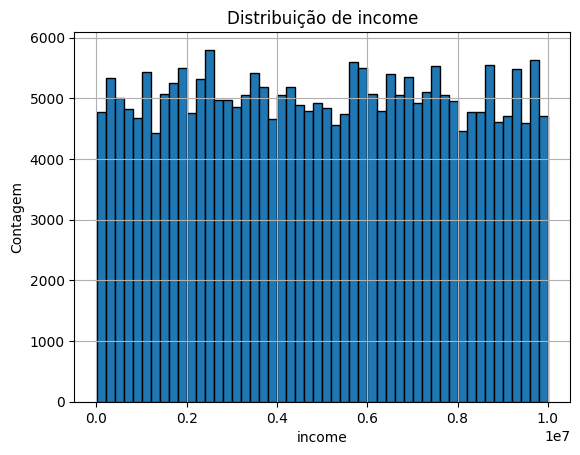

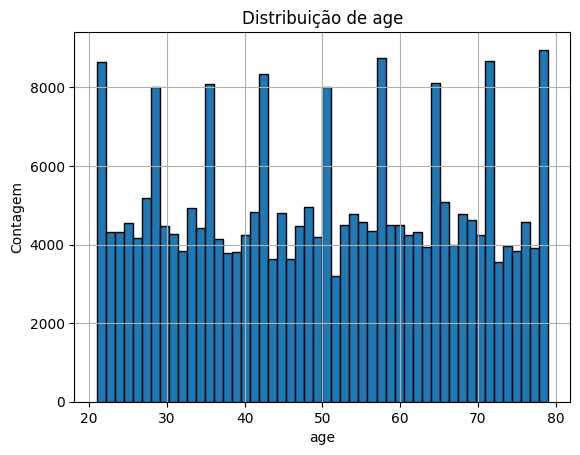

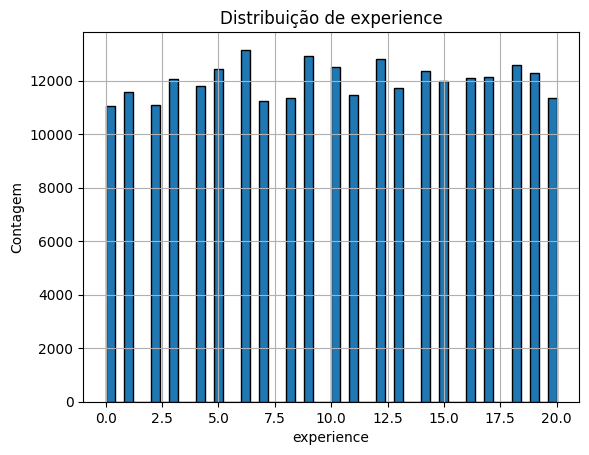

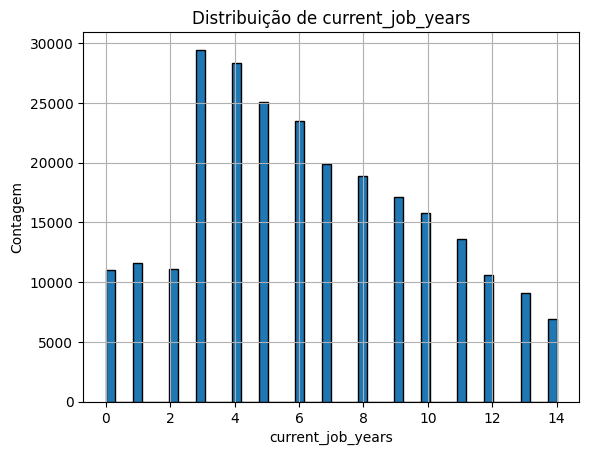

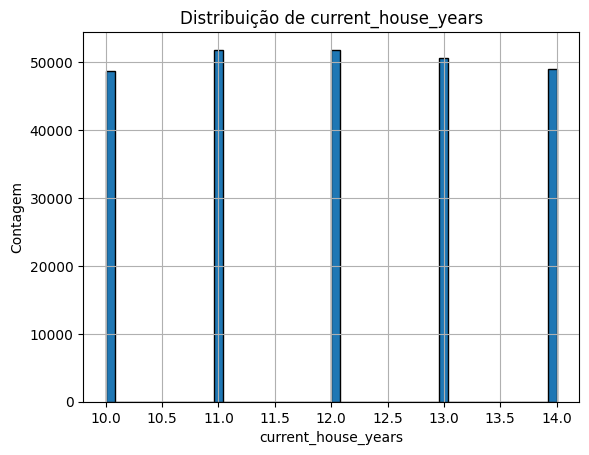

In [11]:
# Variáveis numéricas e categóricas
numeric_vars = ['income', 'age', 'experience', 'current_job_years', 'current_house_years']
categorical_vars = ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

# Histogramas para variáveis numéricas
for var in numeric_vars:
    train_data[var].compute().hist(bins=50, edgecolor='k')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.show()



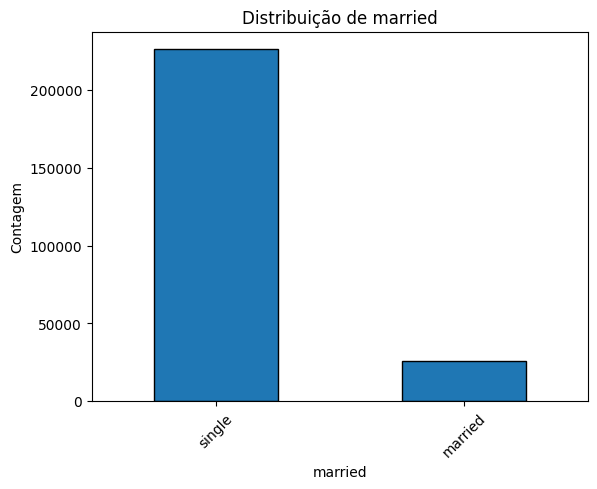

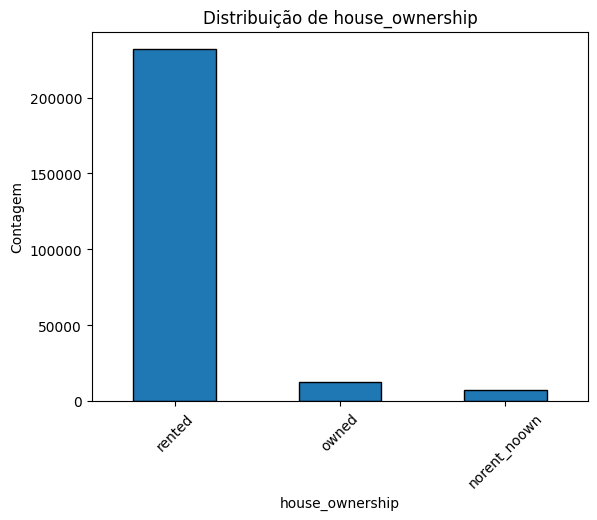

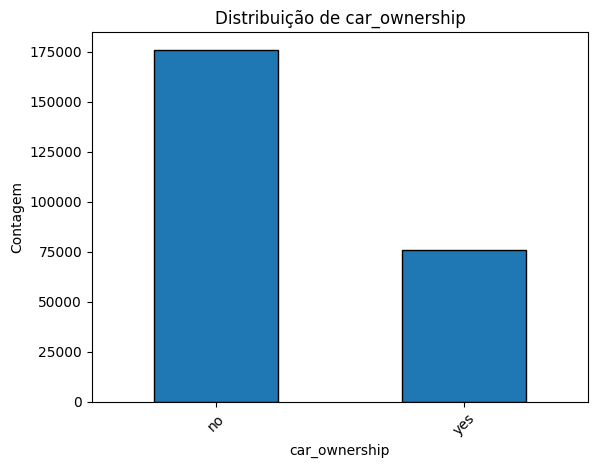

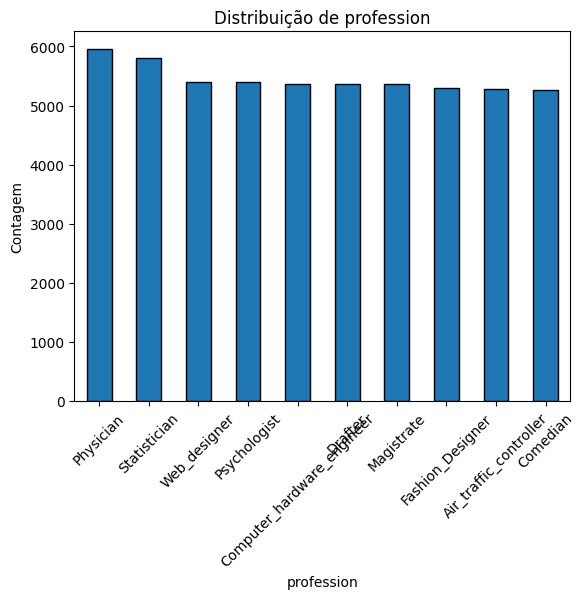

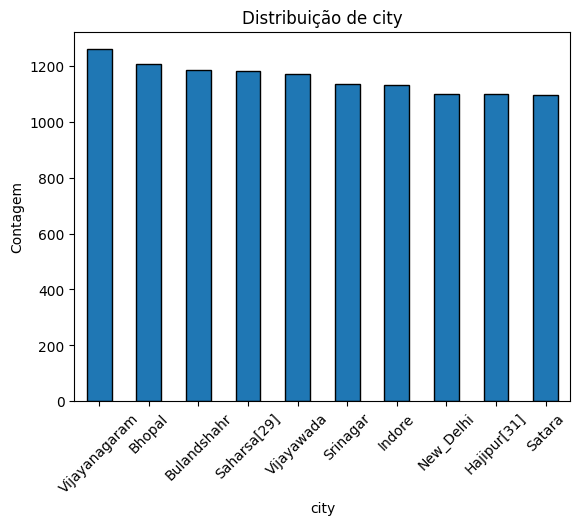

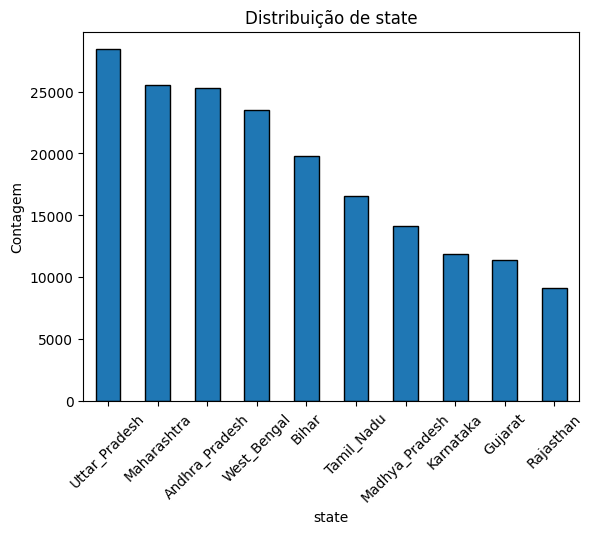

In [12]:
# Gráficos de barras para variáveis categóricas
for var in categorical_vars:
    train_data[var].value_counts().compute().nlargest(10).plot(kind='bar', edgecolor='k')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

### Distribuições Bivariadas:

#### 2.1. Variáveis Numéricas vs. Risk Flag:
Para as variáveis numéricas, podemos usar boxplots para visualizar a distribuição de cada variável em relação ao risk_flag.

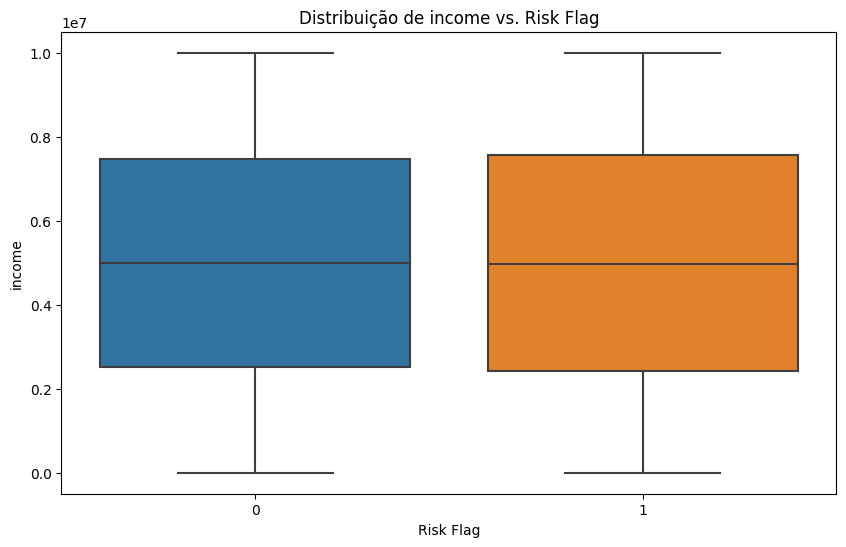

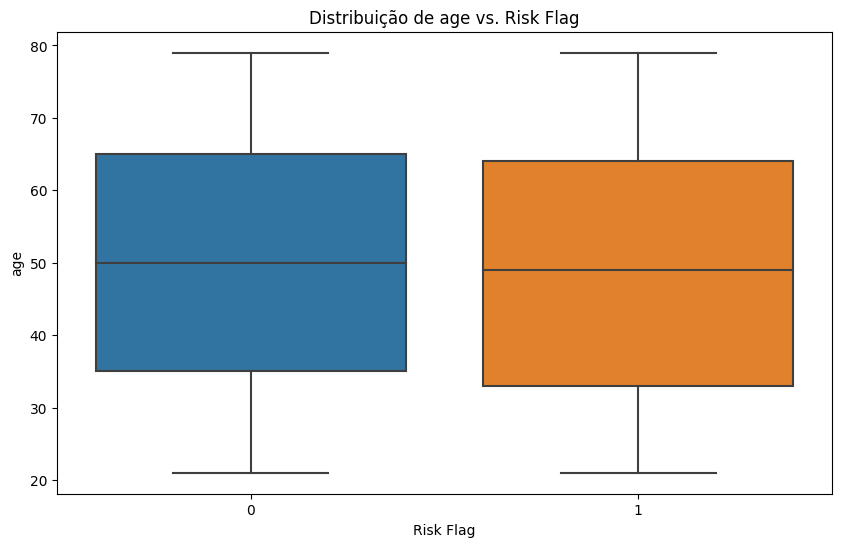

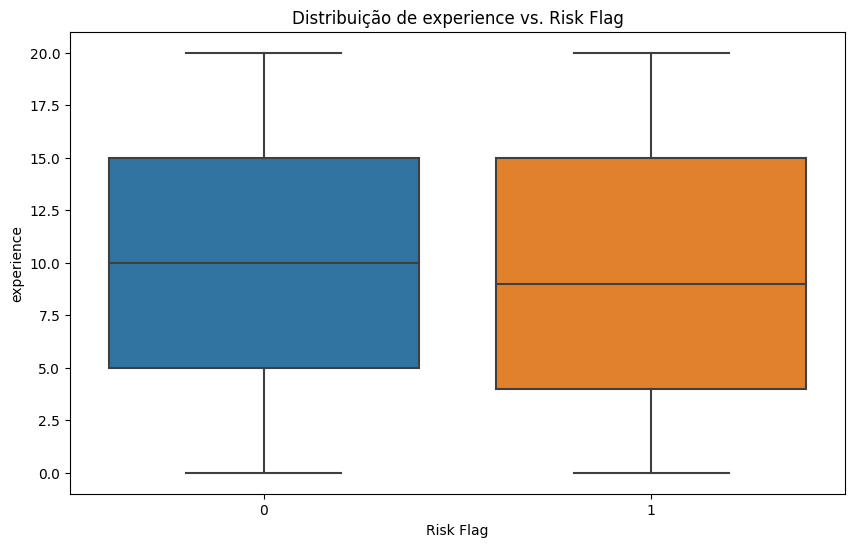

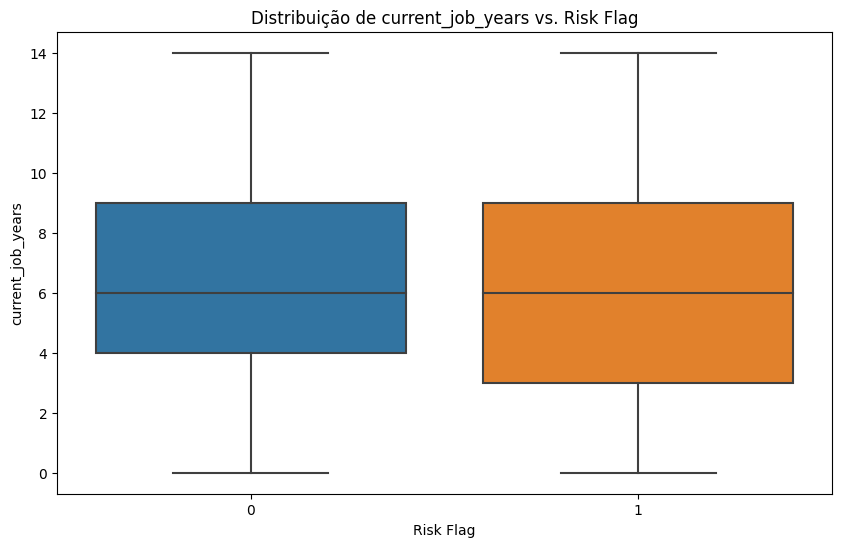

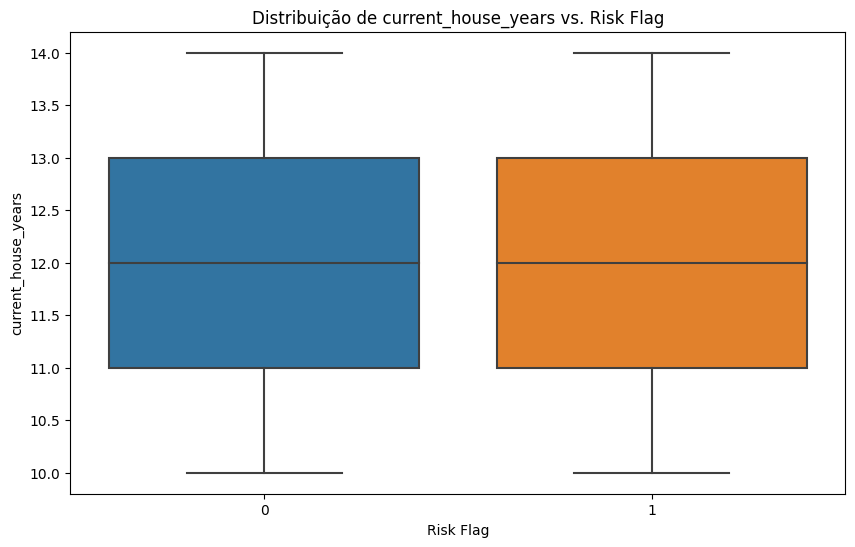

In [13]:
import seaborn as sns

# Variáveis numéricas
numeric_vars = ['income', 'age', 'experience', 'current_job_years', 'current_house_years']

# Boxplots para variáveis numéricas vs. risk_flag
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data.compute(), x='risk_flag', y=var)
    plt.title(f'Distribuição de {var} vs. Risk Flag')
    plt.ylabel(var)
    plt.xlabel('Risk Flag')
    plt.show()


#### 2.2. Variáveis Categóricas vs. Risk Flag:
Para as variáveis categóricas, podemos usar gráficos de barras para mostrar a contagem de cada categoria dividida pelo risk_flag.

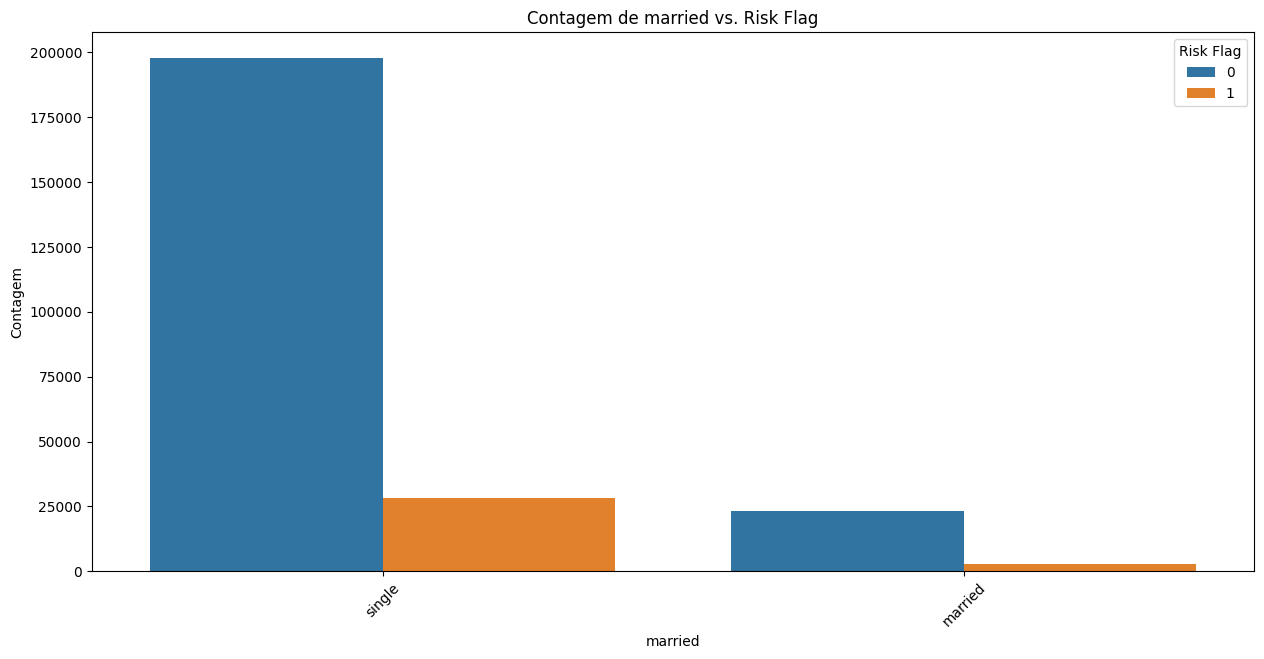

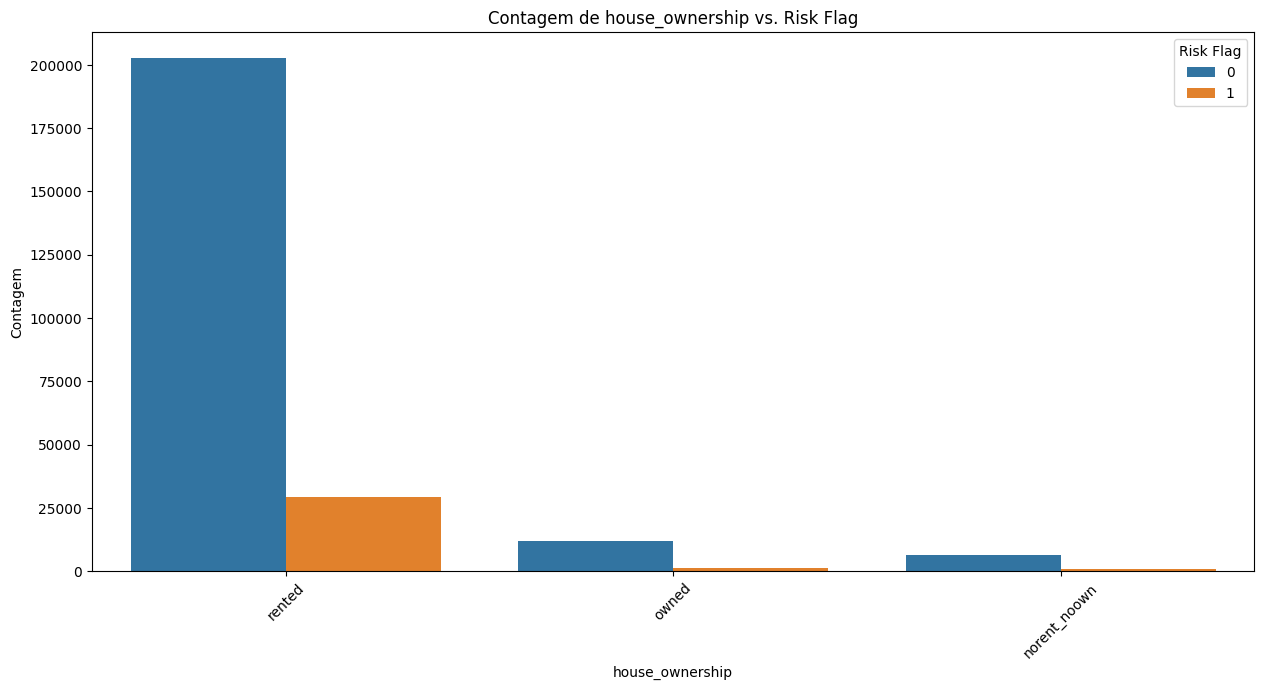

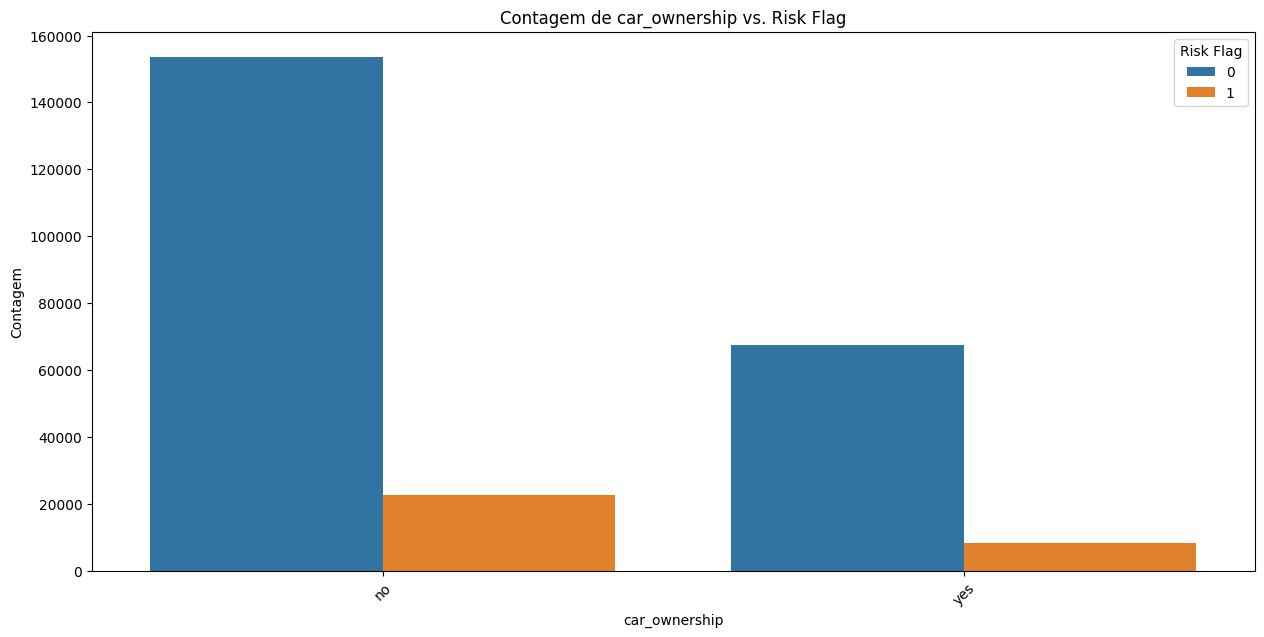

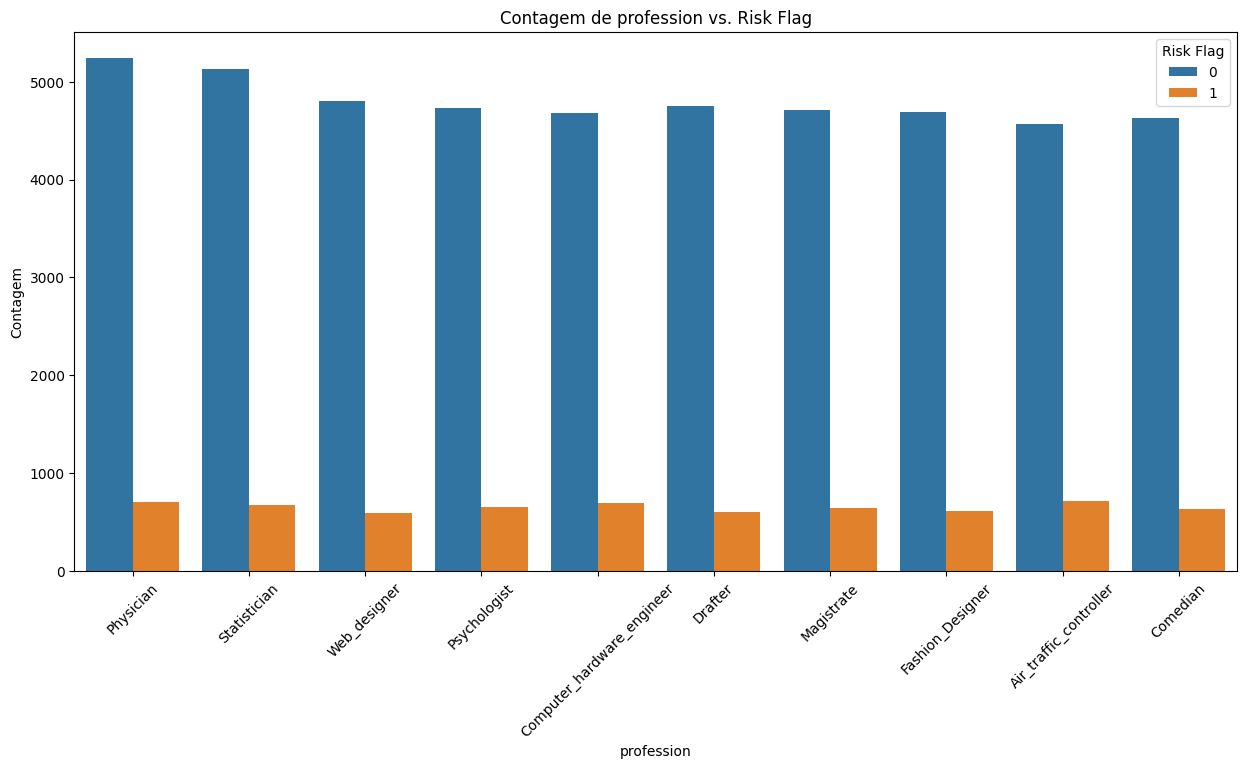

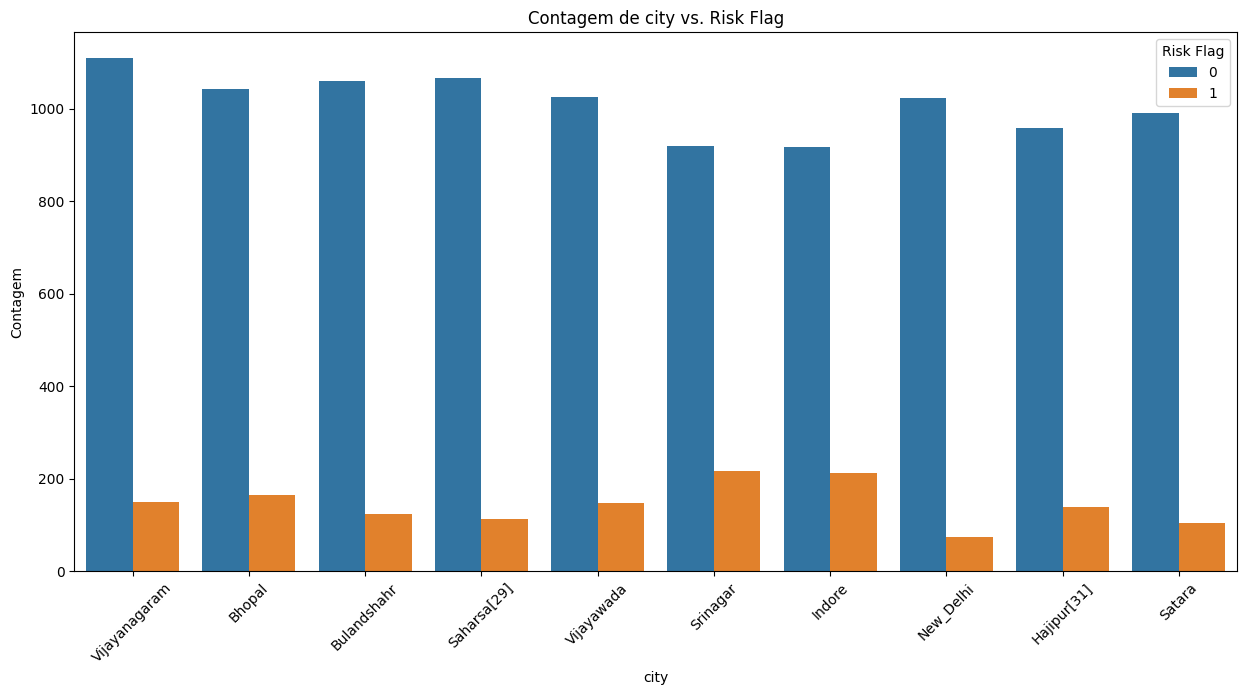

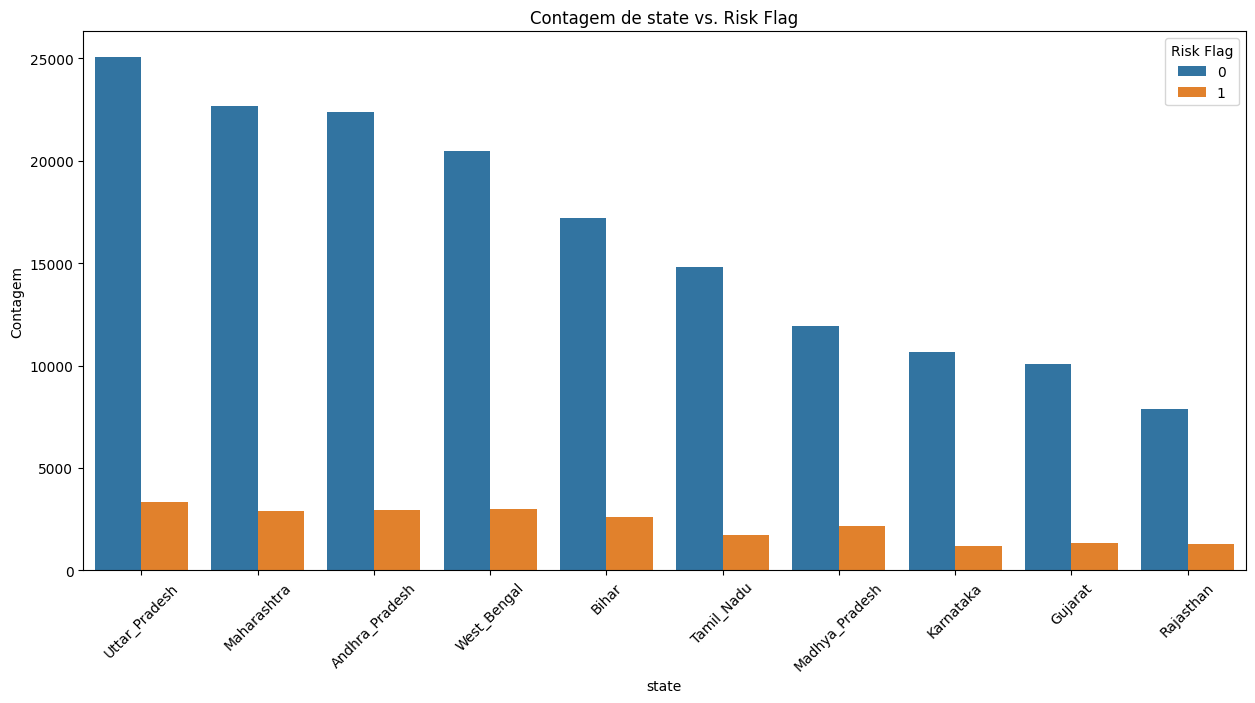

In [14]:
# Variáveis categóricas
categorical_vars = ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

# Gráficos de barras para variáveis categóricas vs. risk_flag
for var in categorical_vars:
    plt.figure(figsize=(15, 7))
    sns.countplot(data=train_data.compute(), x=var, hue='risk_flag', order=train_data[var].value_counts().nlargest(10).index)
    plt.title(f'Contagem de {var} vs. Risk Flag')
    plt.ylabel('Contagem')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.legend(title='Risk Flag')
    plt.show()


### Distribuições Bivariadas-Dispersão:


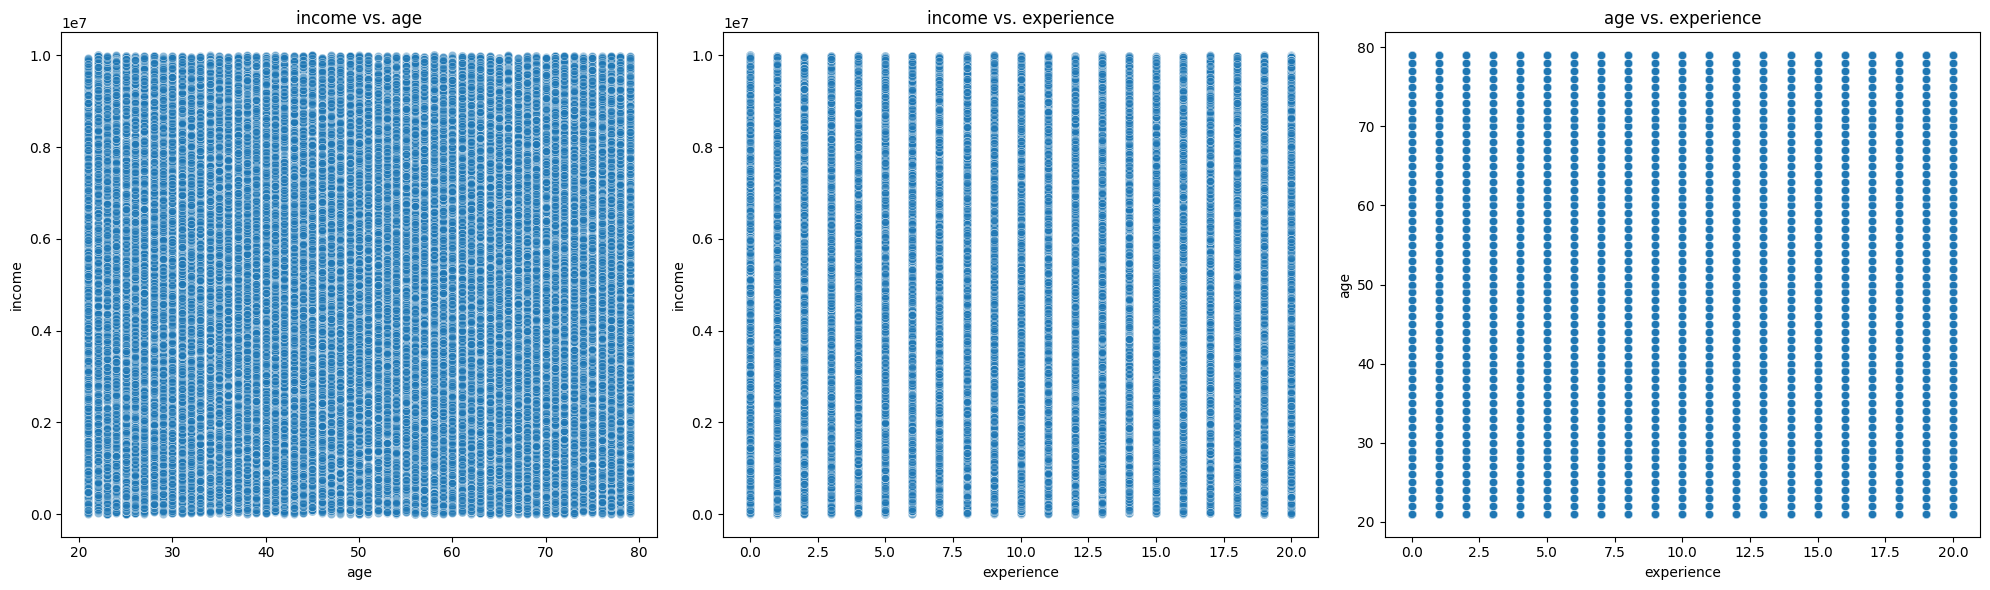

In [15]:
# Definindo as combinações de variáveis para os scatter plots
combinations = [('age', 'income'), ('experience', 'income'), ('experience', 'age')]

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for idx, (x, y) in enumerate(combinations):
    sns.scatterplot(data=train_data, x=x, y=y, alpha=0.5, ax=axes[idx])
    axes[idx].set_title(f'{y} vs. {x}')
    axes[idx].set_xlabel(x)
    axes[idx].set_ylabel(y)

plt.tight_layout()
plt.show()


### Correlações

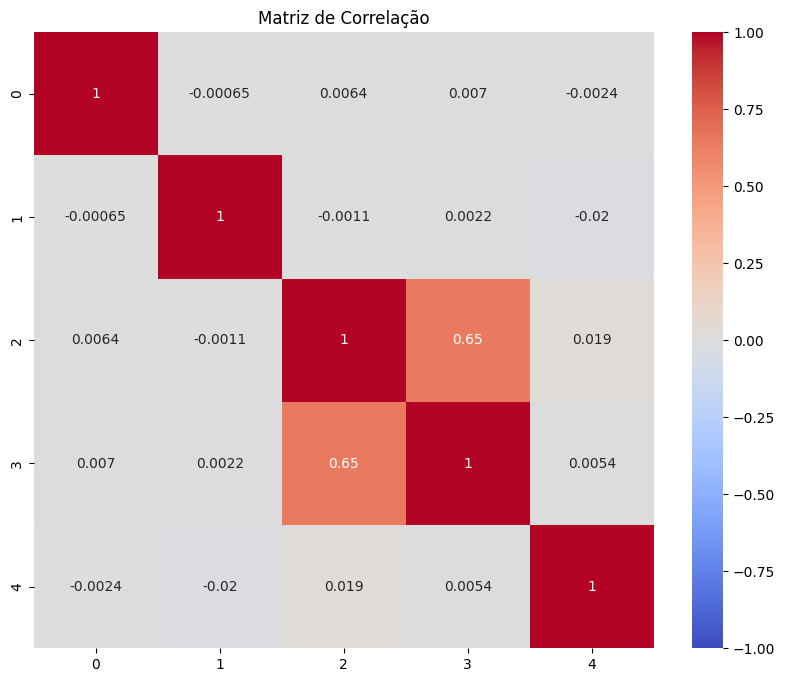

In [16]:
# Calculando a matriz de correlação
correlation_matrix = train_data[numeric_vars].corr()

# Plotando a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()


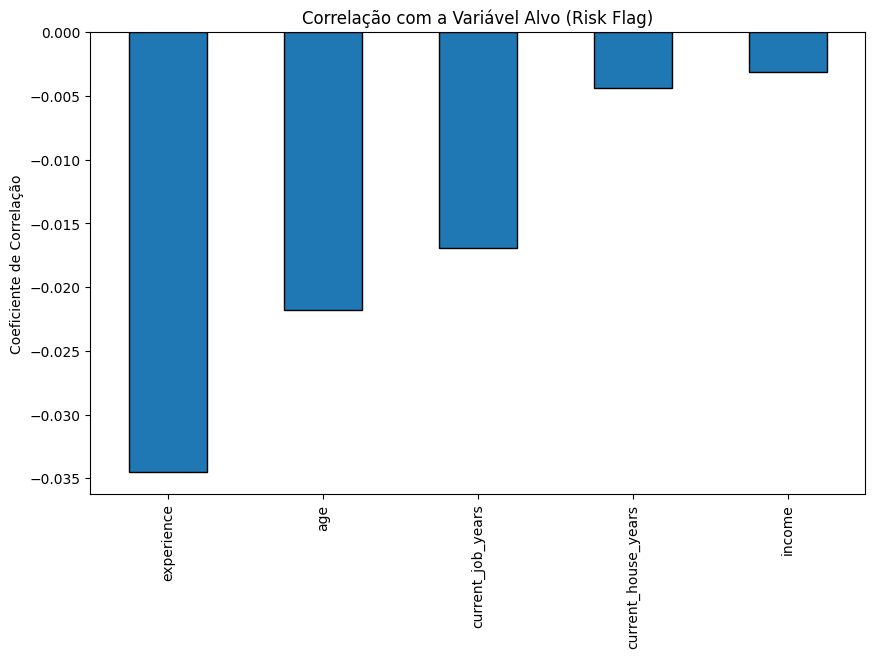

In [17]:
# Calculando a correlação entre a variável alvo e as variáveis numéricas
correlation_with_target = train_data[numeric_vars + ['risk_flag']].corr().compute()['risk_flag']

# Removendo a correlação da variável alvo com ela mesma (será sempre 1)
correlation_with_target = correlation_with_target.drop('risk_flag')

# Plotando a correlação
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values().plot(kind='bar', edgecolor='k')
plt.title('Correlação com a Variável Alvo (Risk Flag)')
plt.ylabel('Coeficiente de Correlação')
plt.show()


### Contagem target

In [18]:
train_data.risk_flag.value_counts().compute()

0    221004
1     30996
Name: risk_flag, dtype: int64

Nesse sentido, para a modelagem preditiva precisamos balancear os dados para obter um modelo mais coerente

### Machine Learning

#### Pré-processamento dos Dados

In [20]:
# Selecionar as colunas de recursos (X)
X = train_data.drop(columns=['Id', 'risk_flag'])

# Selecionar a coluna alvo (y)
y = train_data['risk_flag']


In [21]:
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask_ml\model_selection\_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [22]:
X_train_array = X_train.to_dask_array(lengths=True)
y_train_array = y_train.to_dask_array(lengths=True)

In [23]:
model = LogisticRegression()
model

LogisticRegression()

In [24]:
# model.fit(X_train_array, y_train_array)

Esse aqui não esta rodando fornecerei uma solução alternativa

In [25]:
# X_test_array = X_test.to_dask_array(lengths=True)
# test_predictions = model.predict(X_test_array)

In [26]:
# from dask_ml.metrics import accuracy_score, classification_report
# test_accuracy = accuracy_score(y_test, model.predict(X_test_array))

# report = classification_report(y_test, model.predict(X_test_array))
# print("Acurácia do modelo:", test_accuracy)
# print("Relatório de Classificação:\n", report)

### Solução Alternativa

In [27]:
train_data_new=train_data.compute()

In [28]:
import pandas as pd
df_encoded = pd.get_dummies(train_data_new, columns=['married', 'house_ownership', 'car_ownership', 'profession'])
df_encoded

,Id,income,age,experience,city,state,current_job_years,current_house_years,risk_flag,married_married,...,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer
0,1,1303835,23,3,Rewa,Madhya_Pradesh,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,Parbhani,Maharashtra,9,13,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,3991815,66,4,Alappuzha,Kerala,4,10,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,6256451,41,2,Bhubaneswar,Odisha,2,12,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,5768871,47,11,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,Kolkata,West_Bengal,6,11,0,0,...,0,0,0,0,1,0,0,0,0,0
251996,251997,2843572,26,10,Rewa,Madhya_Pradesh,6,11,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,251998,4522448,46,7,Kalyan-Dombivli,Maharashtra,7,12,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,251999,6507128,45,0,Pondicherry,Puducherry,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_data_new.head()
# Selecionar as colunas de recursos (X)
X = df_encoded.drop(columns=['Id', 'risk_flag','city','state'])

# Selecionar a coluna alvo (y)
y = df_encoded['risk_flag']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
# Criar e treinar um modelo RandomForest
model = RandomForestClassifier()

In [32]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Fazer previsões
predictions = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.8983531746031747


### Observações

Com uma acurácia de aproximadamente 89.85%, podemos concluir que o modelo apresenta um desempenho sólido na tarefa de classificação. A alta taxa de acertos indica uma boa capacidade do modelo em fazer previsões corretas, sugerindo uma efetiva aprendizagem a partir dos dados de teste. No entanto, é sempre aconselhável complementar a análise com outras métricas, especialmente em casos de desequilíbrio de classe, para garantir uma avaliação mais abrangente do desempenho do modelo.

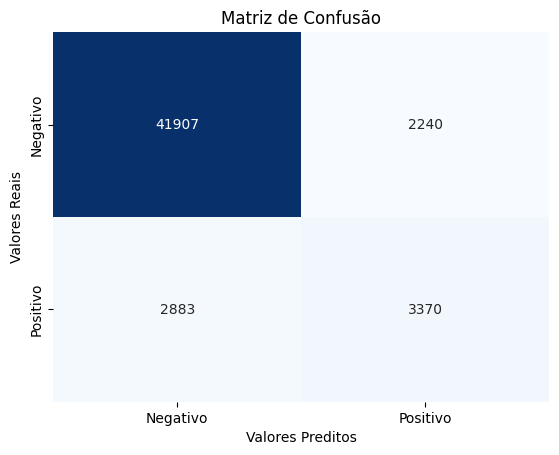

In [34]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Criar um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])

plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

- Verdadeiros Positivos (TP): 3370
- Verdadeiros Negativos (TN): 41907
- Falsos Positivos (FP): 2240
- Falsos Negativos (FN): 2883

In [35]:
from sklearn.metrics import classification_report
# Obtenha o relatório de classificação
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.89      0.90      0.90     50400



### Outras medidas de precisão do modelo

In [36]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# obter métricas
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)

# Imprimir métricas
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')
print(f'Acurácia: {accuracy}')

Precision: 0.894080287256743
Recall: 0.8983531746031747
F1-Score: 0.8959658817983622
Acurácia: 0.8983531746031747


### Conclusão geral


Com base nos resultados da avaliação do modelo, podemos tirar as seguintes conclusões gerais:

##### Desempenho Sólido:

- O modelo demonstrou um desempenho sólido, alcançando uma acurácia, precisão, recall e F1-score em torno de 89.85%. Isso sugere uma capacidade consistente em fazer previsões corretas e em equilibrar a trade-off entre precisão e recall.

##### Efetiva Aprendizagem:

- A alta taxa de acertos, refletida pelos 3370 verdadeiros positivos e 41907 verdadeiros negativos, indica uma efetiva capacidade de aprendizado a partir dos dados de teste. O modelo conseguiu identificar corretamente tanto as instâncias positivas quanto as negativas.
Considerações Adicionais:

- A análise detalhada da matriz de confusão, incluindo falsos positivos (2240) e falsos negativos (2883), fornece insights valiosos sobre as áreas onde o modelo pode ter desafios específicos. Essa análise pode ser utilizada para refinamentos futuros.
Recomendação de Avaliação Contínua:

- É aconselhável continuar a avaliação do modelo, especialmente em casos de desequilíbrio de classe, considerando métricas adicionais e explorando estratégias de ajuste conforme necessário.

##### Aplicabilidade Prática:

- O desempenho sólido do modelo sugere que ele pode ser aplicável em contextos práticos, e decisões baseadas nas previsões podem ser confiáveis. No entanto, é sempre prudente monitorar e ajustar o modelo conforme a evolução dos dados e das necessidades específicas do problema.

Essas conclusões proporcionam uma visão holística do desempenho do modelo, considerando tanto a eficácia nas previsões quanto a necessidade de uma avaliação contínua e refinamentos futuros.